In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
# load the dataset
file_path = r"D:\prisha_manipal_sp\sp_rugved\penguins.csv"
penguins = pd.read_csv(file_path)

print(penguins.head())

# count missing values in each column
missing_values = penguins.isnull().sum()
print("\nmissing values each column:")
print(missing_values)

from sklearn.preprocessing import StandardScaler

# numeric columns
numeric_columns = penguins.select_dtypes(include=['float64', 'int64']).columns

# Standardize
scaler = StandardScaler()
penguins[numeric_columns] = scaler.fit_transform(penguins[numeric_columns])

print("\nNumeric columns after standardization:")
print(penguins[numeric_columns].head())

# replace missing values with the median 
for column in numeric_columns:
    median_value = penguins[column].median()
    penguins[column] = penguins[column].fillna(median_value)


# remove rows where gender is missing
penguins = penguins[penguins['sex'].notna()]

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE

missing values each column:
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

Numeric columns after standardization:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0         -0.884499         0.785449          -0.126893    -0.564142
1         -0.811126         0.126188          -0.107675    -0.501703
2         -0.664380         0.430462          -0.073083    -1.188532
3               NaN              NaN                NaN          

In [42]:
print("\nMissing values after handling:")
print(penguins.isnull().sum())



Missing values after handling:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [43]:
# print(penguins['sex'].value_counts())

In [44]:
print(penguins.columns)

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')


In [45]:
penguins['sex'] = penguins['sex'].map({'MALE': 1, 'FEMALE': 0, '.': -1})

In [46]:
print(penguins.describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
count        335.000000       335.000000         335.000000   335.000000   
mean           0.012185         0.009322           0.001309     0.009272   
std            1.000336         1.000032           1.011825     1.003562   
min           -2.168526        -2.054446          -1.329921    -1.875362   
25%           -0.811126        -0.786635          -0.092301    -0.813898   
50%            0.106037         0.075475          -0.065396    -0.189508   
75%            0.848939         0.785449          -0.003900     0.731468   
max            2.875868         2.205397          18.395124     2.620248   

              sex  
count  335.000000  
mean     0.501493  
std      0.506690  
min     -1.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  


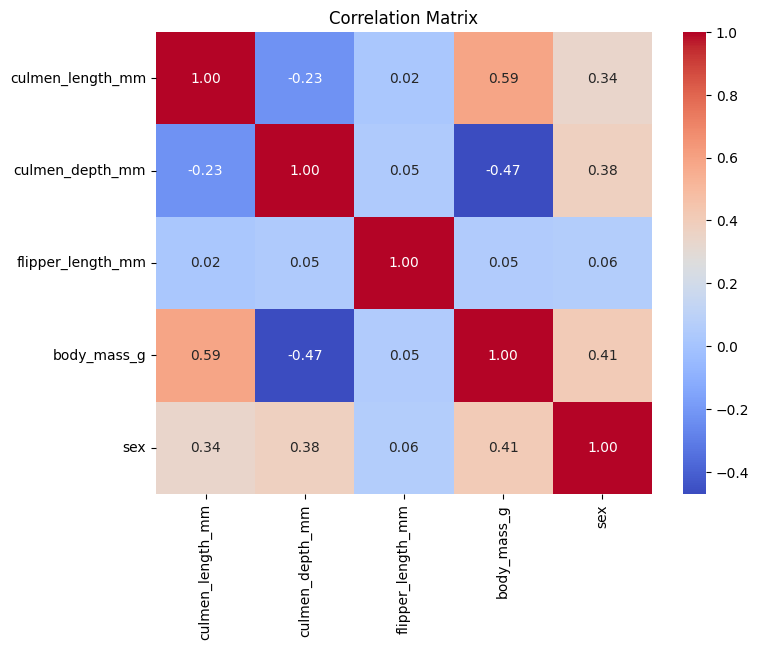

In [47]:
plt.figure(figsize=(8, 6))
correlation_matrix = penguins.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.decomposition import PCA

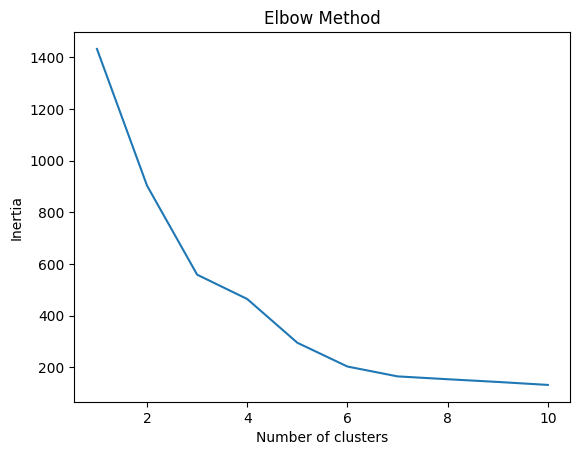

In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []

# Test different numbers of clusters (from 1 to 10, for example)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins)
    inertia.append(kmeans.inertia_)

# Plot the inertia vs. number of clusters
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

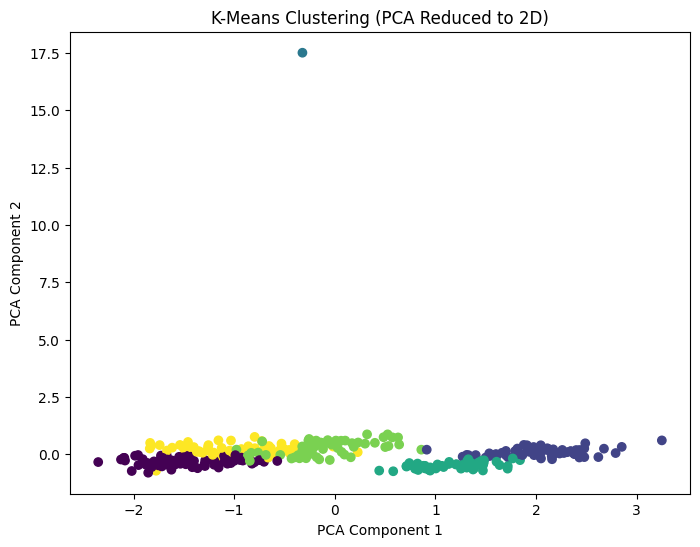

Final Inertia: 203.2229857349588


In [55]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# KMeans clustering
kmeans = KMeans(n_clusters=6, n_init=10, max_iter=300, random_state=42)
kmeans.fit(penguins[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']])

# add the cluster labels to DataFrame
penguins['cluster'] = kmeans.labels_

# PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(penguins[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']])

# Visualize the clusters 
plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=penguins['cluster'], cmap='viridis')
plt.title('K-Means Clustering (PCA Reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# final inertia to check if the algorithm converged
print(f"Final Inertia: {kmeans.inertia_}")


Iteration 1 complete. Inertia: 213.1034357380462


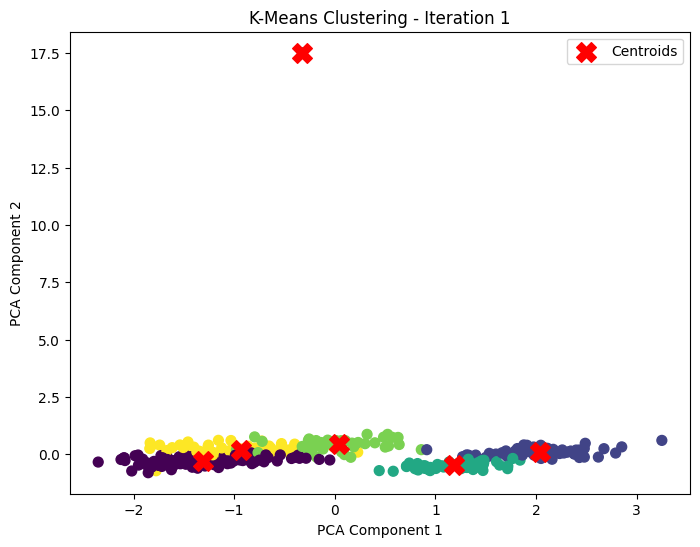

Iteration 2 complete. Inertia: 209.62470255152618


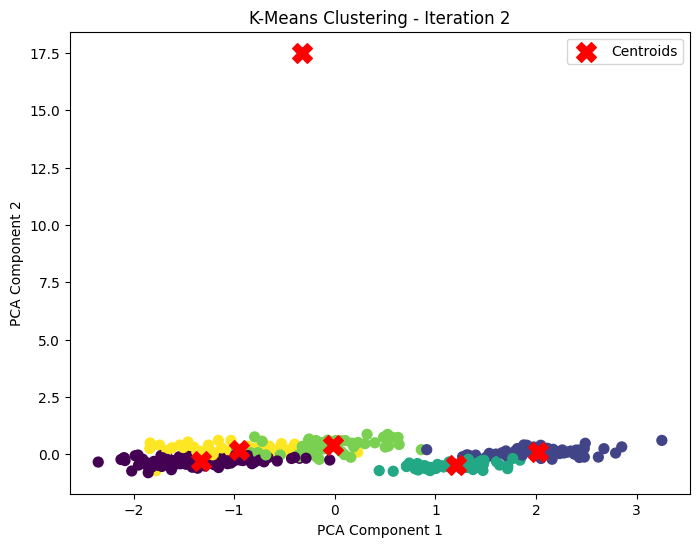

Iteration 3 complete. Inertia: 205.88580503726325


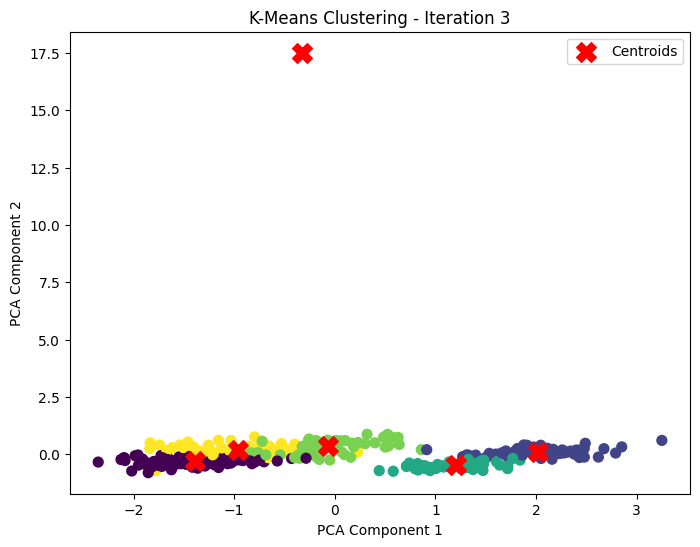

Iteration 4 complete. Inertia: 203.63435258840127


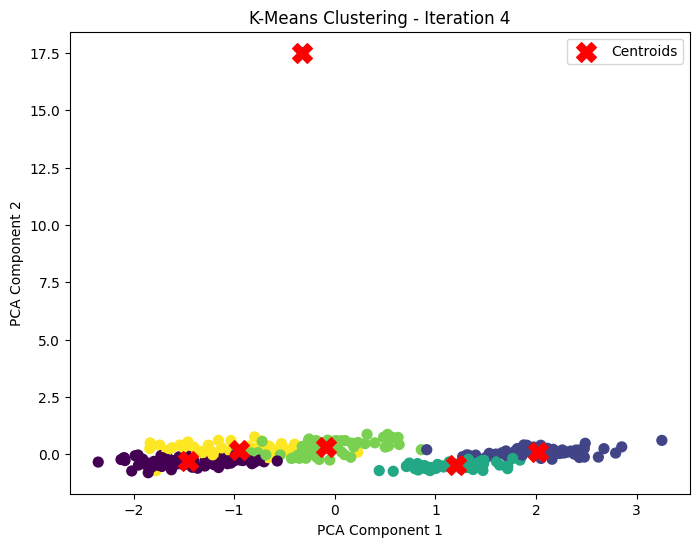

Iteration 5 complete. Inertia: 203.3248566895084


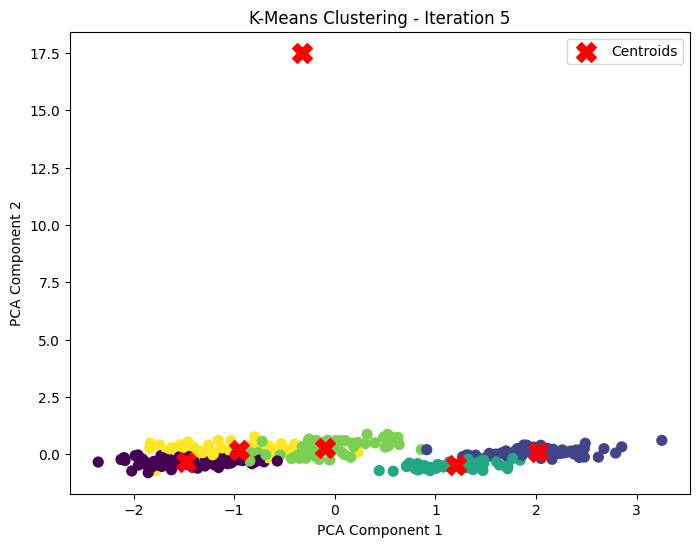

Iteration 6 complete. Inertia: 203.2229857349588


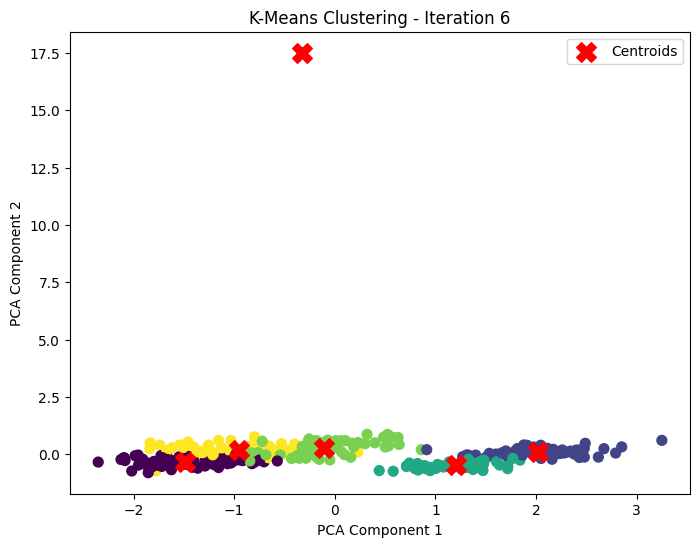

Iteration 7 complete. Inertia: 203.2229857349588


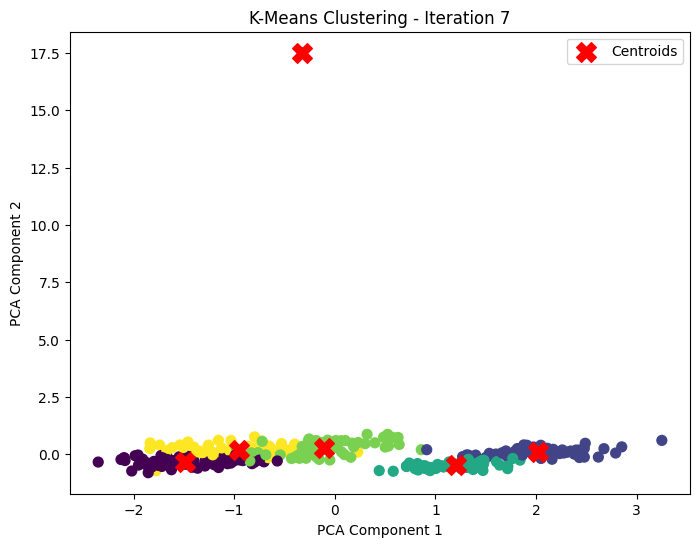

Convergence reached.


In [60]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# the features
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

# K-Means implementation to track inertia and visualize clusters
class CustomKMeans:
    def __init__(self, n_clusters, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.inertia_ = []

    def fit(self, data):
        # initialize KMeans
        self.kmeans = KMeans(
            n_clusters=self.n_clusters,
            max_iter=1,  # Limit to 1 iteration at a time
            random_state=self.random_state,
            init='k-means++',
            n_init=1,
            verbose=0,
        )
        # iteratively fit the model and store inertia
        for i in range(self.max_iter):
            self.kmeans.max_iter = i + 1
            self.kmeans.fit(data)
            self.inertia_.append(self.kmeans.inertia_)
            print(f"Iteration {i + 1} complete. Inertia: {self.kmeans.inertia_}")

            # visualize the clusters after this iteration
            self.visualize_clusters(data, i + 1)

            # stop if convergence is reached
            if len(self.inertia_) > 1 and self.inertia_[-1] == self.inertia_[-2]:
                print("Convergence reached.")
                break

    def visualize_clusters(self, data, iteration):
        # PCA for visualization
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(data)
        cluster_labels = self.kmeans.labels_

        # transform centroids to match feature names
        centroids = pd.DataFrame(self.kmeans.cluster_centers_, columns=data.columns)
        reduced_centroids = pca.transform(centroids)

        # plot the clusters
        plt.figure(figsize=(8, 6))
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', s=50)
        plt.scatter(
            reduced_centroids[:, 0],
            reduced_centroids[:, 1],
            c='red',
            marker='X',
            s=200,
            label='Centroids'
        )
        plt.title(f'K-Means Clustering - Iteration {iteration}')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.legend()
        plt.show()

custom_kmeans = CustomKMeans(n_clusters=6, max_iter=100, random_state=42)
custom_kmeans.fit(penguins[features])